In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.style.use('fivethirtyeight')

In [3]:
zb_tweets = pd.read_csv('new_BoniekZibi_tweets_2.csv')

In [4]:
zb_tweets.head(10)

,id_str,created_at,text,source,in_reply_to_user_id_str,retweet_count,favorite_count
0,1283500768004366336,2020-07-15 20:36:44,Che giocatore @EdDzeko 👌🏻👌🏻,Twitter for iPhone,nan,10,33
1,1283477506813825025,2020-07-15 19:04:18,"Do @_1liga_ jeszcze daleko, ale dzisiaj po raz pierwszy w erze COVID 19 @RTS_Widzew_Lodz grał w piłkę 👏🏻👏🏻👏🏻",Twitter for iPhone,nan,6,282
2,1283463141880475648,2020-07-15 18:07:13,@TSP_SA w Esa. Gratuluje serdecznie. Brawo👍🏻👍🏻,Twitter for iPhone,1922779010.00,2,37
3,1283461568051765248,2020-07-15 18:00:58,"3-0 do przerwy, cicho sza🤞🤞🤞",Twitter for iPhone,nan,3,396
4,1283439195894292482,2020-07-15 16:32:04,RT @pzpn_pl: Od 21 listopada do 18 grudnia będzie trwał mundial w 2022 roku w Katarze.\r\n\r\nSzczegółowy harmonogram ⤵,Twitter for iPhone,nan,5,0
5,1283380315659083776,2020-07-15 12:38:05,RT @AmpFutbolPolska: NIEZWYKLI PIŁKARZE ❤⚽\r\n\r\n✅ PASJA 😍 \r\n✅ RADOŚĆ 😃 \r\n✅ MOTYWACJA 🔥\r\n\r\nZobaczcie jak grają najmłodsi piłkarze z niepełnosprawnoś…,Twitter for iPhone,nan,20,0
6,1283338071812059136,2020-07-15 09:50:14,Potwierdzam👍🏻 https://t.co/BUcYG76vBA,Twitter for iPhone,nan,1,28
7,1283331717139398657,2020-07-15 09:24:59,Szanowny Panie @PNisztor zgodnie z obietnicą odpowiadam:\r\nOdp na pyt 4 - inne niż z moją żoną😜\r\nOdp na pyt 5 - nie ma… https://t.co/7xAPRmGKeX,Twitter for iPhone,nan,5,215
8,1283300398535790592,2020-07-15 07:20:32,"Gratuluje wygranej walki, oglądałem. Trzymam kciuki👊🏻👍🏻 https://t.co/UDugLCd6BY",Twitter for iPad,nan,3,116
9,1283294482885234688,2020-07-15 06:57:01,RT @pzpn_pl: Znamy datę i godzinę meczu o Superpuchar Polski! \r\n\r\n📆 9 sierpnia 2020 | 20:00\r\n\r\nKomunikat 👉 https://t.co/37TwAPtpSA https://t.co…,Twitter for iPad,nan,7,0


In [5]:
zb_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_str                   3229 non-null   int64  
 1   created_at               3229 non-null   object 
 2   text                     3229 non-null   object 
 3   source                   3229 non-null   object 
 4   in_reply_to_user_id_str  1002 non-null   float64
 5   retweet_count            3229 non-null   int64  
 6   favorite_count           3229 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 176.7+ KB


In [6]:
zb_tweets['created_at'] = pd.to_datetime(zb_tweets['created_at'])

In [7]:
zb_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id_str                   3229 non-null   int64         
 1   created_at               3229 non-null   datetime64[ns]
 2   text                     3229 non-null   object        
 3   source                   3229 non-null   object        
 4   in_reply_to_user_id_str  1002 non-null   float64       
 5   retweet_count            3229 non-null   int64         
 6   favorite_count           3229 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 176.7+ KB


In [8]:
print("Początek: ", zb_tweets['created_at'].min())
print("Koniec: ", zb_tweets['created_at'].max())

Początek:  2019-04-17 19:30:05
Koniec:  2020-07-15 20:36:44


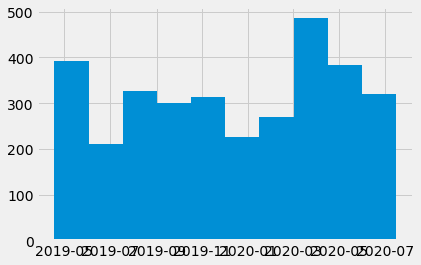

In [47]:
zb_tweets['created_at'].hist()

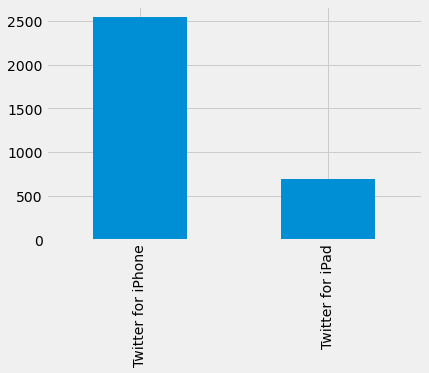

In [48]:
#z jakich urządzeń korzysta Zbigniew Boniek
zb_tweets['source'].value_counts().plot(kind='bar')

In [11]:
#funkcja, która zlicza ilość wyrazów w danym tweecie
def word_count(str):
    return len(str.split())

#funkcja, która zlicza ilość różnych wyrazów w danym tweecie
def dif_word_count(str):
    counts = dict()
    words = str.split()
    
    for word in words:
        if word in count:
            count[word] +=1
        else:
            count[word] = 1
    return counts

#funkcja zliczająca tweety
def tweet_counts(tweet_array, threshold = 10):
    unique, counts = np.unique(np.array(tweet_array), return_counts=True)
    count_dict = dict(zip(unique,counts))
    
    return [(k,v) for k,v in count_dict.items() if v > threshold]

In [12]:
#tweety pisane do konkretnych ludzi
who_zibi_replies_to = []
for tweet in zb_tweets['text']:
    if tweet[:1] == '@':
        #wzmianka
        tweet_splited = tweet.split()
        for i in range (0,len(tweet_splited)):
            if tweet_splited[i][0] == '@':
                who_zibi_replies_to.append(tweet_splited[i])
        

In [13]:
#Boniek odpisywał częściej niż 5 razy
zibi_reply_counts = tweet_counts(who_zibi_replies_to, 5)
zibi_reply_counts

[('@AdamGodlewski', 9),
 ('@BL_1916', 40),
 ('@BorekMati', 47),
 ('@CeltDawid', 13),
 ('@CommonSensePL', 6),
 ('@DawidOlejnicza5', 6),
 ('@GrosickiKamil', 6),
 ('@GrzegKrychowiak', 6),
 ('@Iwanczyk_P', 7),
 ('@JOlkiewicz', 12),
 ('@JakubRzezniczak', 10),
 ('@JaroslawBinczyk', 9),
 ('@K_Stanowski', 125),
 ('@Kacpo24', 7),
 ('@KoltonRoman', 38),
 ('@LaczyNasPilka', 13),
 ('@LordKoks', 6),
 ('@LukaszOlkowicz', 12),
 ('@MKSCracoviaSSA', 8),
 ('@M_Wawrzynowski', 13),
 ('@Maciej_Sawicki', 9),
 ('@MiBiBialonski', 14),
 ('@MichalS1978', 7),
 ('@NiemiecRyszard', 6),
 ('@PiotrWolosik', 26),
 ('@Polsport', 24),
 ('@PrawdaFutbolu', 17),
 ('@RTS_Widzew_Lodz', 10),
 ('@RafalStec', 16),
 ('@RobertoRenga', 8),
 ('@SebastianMila11', 6),
 ('@SzJadczak', 21),
 ('@TSmokowski', 31),
 ('@TwaroTwaro', 7),
 ('@W_Kowal', 12),
 ('@WeszloCom', 12),
 ('@Wieslaw_Wilczyn', 6),
 ('@ZelekZyzynski', 10),
 ('@_Ekstraklasa_', 13),
 ('@cwiakala', 14),
 ('@czesmich', 17),
 ('@garnekmedia', 10),
 ('@grajmy_razem', 6),
 ('@

In [14]:
#wrzućmy to do DataFrame porządkując od największej do najmniejszej ilości wzmianek
zibi_replies_df = pd.DataFrame(zibi_reply_counts, columns=['who', 'count']).sort_values('count', ascending = False)
zibi_replies_df

,who,count
12,@K_Stanowski,125
2,@BorekMati,47
1,@BL_1916,40
14,@KoltonRoman,38
50,@mogiel90,32
32,@TSmokowski,31
24,@PiotrWolosik,26
45,@kowalski_cezary,25
25,@Polsport,24
49,@matiswiecicki,22


In [15]:
#oryginalne tweety (bez wzmianek innych użytkowników)
for tweet in zb_tweets['text']:
    if tweet[:1] != '@':
        print(tweet)

Che giocatore @EdDzeko 👌🏻👌🏻
Do @_1liga_  jeszcze daleko, ale dzisiaj po raz pierwszy w erze COVID 19 @RTS_Widzew_Lodz grał w piłkę 👏🏻👏🏻👏🏻
3-0 do przerwy, cicho sza🤞🤞🤞
RT @pzpn_pl: Od 21 listopada do 18 grudnia będzie trwał mundial w 2022 roku w Katarze.

Szczegółowy harmonogram ⤵
RT @AmpFutbolPolska: NIEZWYKLI PIŁKARZE ❤⚽

✅ PASJA 😍 
✅ RADOŚĆ 😃 
✅ MOTYWACJA 🔥

Zobaczcie jak grają najmłodsi piłkarze z niepełnosprawnoś…
Potwierdzam👍🏻 https://t.co/BUcYG76vBA
Szanowny Panie @PNisztor zgodnie z obietnicą odpowiadam:
Odp na pyt 4 - inne niż z moją żoną😜
Odp na pyt 5 - nie ma… https://t.co/7xAPRmGKeX
Gratuluje wygranej walki, oglądałem. Trzymam kciuki👊🏻👍🏻 https://t.co/UDugLCd6BY
RT @pzpn_pl: Znamy datę i godzinę meczu o Superpuchar Polski! 

📆 9 sierpnia 2020 | 20:00

Komunikat 👉 https://t.co/37TwAPtpSA https://t.co…
Pan Redaktor @PNisztor z Gazety Polskiej zwrócił się do PZPN  abyśmy odpowiedzieli (do 16.07) na 8 pytań. Na pytani… https://t.co/5588OtDB9n
Dzisiaj Pani Wiesia ma 64 urodziny❤️❤

Wszystko ok, zaskoczyło mnie tylko ze tak łatwo do bramki trafił👍🏻👍🏻#naszGrosik https://t.co/KFRSXUzFAA
RT @PilkaNozna_pl: Dzień dobry!
Od jutra w kioskach, salonach prasowych i naszej aplikacji mobilnej znajdziecie najnowsze wydanie tygodnika…
Tak sobie pomyślałem 28 marca👍🏻 Gramy dalej🇵🇱👍🏻🇵🇱 https://t.co/ShsHT5cR0b
Marek to widział😜😜 ? Pr czy coś porządnego?  Mnie to się bardzo podobało👍🏻👍🏻 https://t.co/9GAgOUowXi
RT @pzpn_pl: Zachęcamy do darmowego pobrania kolejnego suplementu Narodowego Modelu Gry pt. Trening Formacyjny.

Na temat tej publikacji wy…
Smutek.... https://t.co/tsWSmuPjpK
Janek miał prawdziwe „papiery na grę”👍🏻⚽️🇵🇱 https://t.co/3DknyyzqQr
Mój ulubiony instrument👍🏻 moja ulubiona piosenka😜🇵🇱🌷⚽️ https://t.co/fbol6lxOU5
Mój ulubiony i najbardziej ceniony Trener Antoni Piechniczek kończy dzisiaj 78 lat. Zdrowia Panie Tenerze i dzięki… https://t.co/2mov35n6np
RT @pzpn_pl: Z Andrzejem Personem rozmawialiśmy o Fundacji PIłkarstwa Polskiego. 
O tym, jakie są jej główne założeni

Anioł pasterzom mówił .........nr1 @GrzegKrychowiak https://t.co/H0qVIVj9hi
Spokój, klasa i precyzja @GrzegKrychowiak 😜👍🏻 https://t.co/5zy1FZr1o9
Panie Wiesie🍾🍾 Wszystkiego Najlepszego🌹Dzisiaj Wasz Dzień 🌷🌷 Dla tej Wiesi także 😜😜😜 https://t.co/mcw8AbGPmn
https://t.co/rEn4Y9SElI Tomek ma rację, pożegnałem Go po zakończeniu Gali. Nigdzie nie uciekł, czy był zły? Nie wie… https://t.co/Y57C9gfhka
RT @UlubionaETV: Wiemy, że Pani Irena Santor nie ma pojęcia o naszym istnieniu. Nic nie szkodzi. Z okazji 85-tych urodzin wrzucamy ten śred…
Brawo Trener👍🏻 https://t.co/84W9qmfkP5
Grazie 1000 Presidente. Grazie 1000 UEFA 🇵🇱⚽️ https://t.co/Bz2hjp8Q9p
RT @LaczyNasPilka: W ten weekend gole strzelili https://t.co/asc3hHqJvQ. Piotr Zieliński i Krzysztof Piątek - cieszymy się BARDZO! 😍🤗
#Mond…
Tak to wygląda👍🏻👍🏻 https://t.co/H8i47UG81j
Ruszam z akcją #KoszulkaDlaZdrowia. Hej @TSmokowski chciałeś ją mieć , pewnie Ibra byłby zadowolony. Licytujemy ❤️… https://t.co/F3uhu9v3BB
RT @PZPNGrassroots: Co nas łąc

RT @LaczyNasPilka: Jest już nowy odcinek "VARto wiedzieć"❗

Przedstawiamy w nim krok po kroku https://t.co/asc3hHqJvQ. szeroko komentowaną…
Brawo PS 👍🏻🇵🇱⚽️ https://t.co/qFn973177w
Bo nasze serca są 🇵🇱🇵🇱🇵🇱🇵🇱🇵🇱🇵🇱🇵🇱🇵🇱🇵🇱🇵🇱🇵🇱🇵🇱🇵🇱🇵🇱🇵🇱🇵🇱🇵🇱🇵🇱
Do jutra 🏆🇵🇱⚽️ https://t.co/BBvNR0Pfv8
To tylko @Kamil_Grabara1 łapie.
Brawo Ewa👍🏻⚽️🇵🇱 https://t.co/1t1EI5JnXI
W oczekiwaniu na prawdziwy Finał 🏆🇵🇱🏆 oglądamy półfinał CL https://t.co/nbQypAKdQM
Potwierdzam👊🏻 https://t.co/1LmZMczSC7
Czekamy 🏆🇵🇱⚽️ https://t.co/HBytndLYof
Zuzia Witek wygrała Tymbark u -10 w 2017 roku po rzutach karnych. Rok temu jak i dzisiaj odpadła ze swoją drużyną w… https://t.co/d8kdzgQkWd
Lot rezygnuje od 1 maja z „ Prince Polo” . Zostaną zastąpione przez „ Grześki”. Zaczynam strajkować, kto jest  ze mną👊🏻?😡😡
Ja w imieniu swoim i @MaciejoSzczesny mam do @TomekHajto7 małe pytanie-  „ Przyjacielu jak dzisiaj wygra Tottenham… https://t.co/ShgcKw0Ohl
Dla mnie 3-1👍🏻 https://t.co/HJsLRkkV2H
RT @dolzpnwroc: Dzieci z Tymbarku na żywo w studio ⁦

In [16]:
#tylko retweety
who_zibi_retweets = []
for tweet in zb_tweets['text']:
    if tweet[:2] == 'RT':
        #retweet
        splited = tweet.split(': ')
        rt, who = splited[0].split(' ')
        who_zibi_retweets.append(who)  

In [17]:
#RT
zibi_retweet_counts = tweet_counts(who_zibi_retweets, 5)
zibi_retweet_counts

[('@AmpFutbolPolska', 9),
 ('@FIFAcom', 6),
 ('@LaczyNasPilka', 197),
 ('@Maciej_Sawicki', 8),
 ('@MiBiBialonski', 7),
 ('@PZPNGrassroots', 23),
 ('@PZPNPuchar', 10),
 ('@RTS_Widzew_Lodz', 6),
 ('@a_delimat', 6),
 ('@adriandudacom', 8),
 ('@laczynaskobieca', 50),
 ('@mzachodny', 7),
 ('@pzpn_pl', 47),
 ('@sport_tvppl', 9)]

In [18]:
#DataFrame
zibi_retweet_df = pd.DataFrame(zibi_retweet_counts, columns=['who', 'count']).sort_values('count', ascending = False)
zibi_retweet_df

,who,count
2,@LaczyNasPilka,197
10,@laczynaskobieca,50
12,@pzpn_pl,47
5,@PZPNGrassroots,23
6,@PZPNPuchar,10
0,@AmpFutbolPolska,9
13,@sport_tvppl,9
3,@Maciej_Sawicki,8
9,@adriandudacom,8
4,@MiBiBialonski,7


In [19]:
zb_tweets.sample(10)

,id_str,created_at,text,source,in_reply_to_user_id_str,retweet_count,favorite_count
2402,1161698598356213760,2019-08-14 17:58:23,"Legia zdecydowanie lepsza, Cafu wykorzystał kontuzje kolegi „ alla grande”. Z Rangersami wszystko możliwe.",Twitter for iPhone,nan,4,378
108,1278614862378254336,2020-07-02 09:01:53,"Sorry, @PawelWojtala nie ma z tym nic wspólnego. Rozgrywki prowadzi Pomorski ZPN i nie przyznał licencji. Dlaczego… https://t.co/lx568f8nzR",Twitter for iPhone,nan,1,50
1166,1235329062446542850,2020-03-04 22:19:34,"@HistoriaWisly Prosze pozdrowić. Krakowska szkoła, dobra technika, gra kombinacyjna, przyjemnie się z Leszkiem grało👍🏻⚽️🇵🇱",Twitter for iPhone,3240730575.00,1,40
256,1269703241731846147,2020-06-07 18:50:17,"Oglądałem.. gratuluję, walczcie dalej. I proszę pozdrowić Młodego👍🏻👍🏻 https://t.co/M8z9ruQDUd",Twitter for iPad,nan,1,30
3078,1126231584506634245,2019-05-08 21:05:08,"W Anglii grają od rana do wieczora przez cały rok i nikt nie płacze. Finały CL i EL tylko angielskie w tym roku, prawdopodobnie👍🏻",Twitter for iPhone,nan,18,1018
1123,1237386124328230914,2020-03-10 14:33:36,"@SzJadczak @pzpn_pl Proszę Pana , ten człowiek dostał karę i ją odbył. Klub jako niezależna jednostka może go zatru… https://t.co/5xfx2ArV0i",Twitter for iPhone,43512158.00,1,79
2587,1154725167798661121,2019-07-26 12:08:28,@LukaszOlkowicz A co Pan rozumie pod wyrażeniem „ taktyka indywidualna”?,Twitter for iPhone,2302054460.00,0,27
3206,1120714332516560897,2019-04-23 15:41:33,"Za 2/3 tyg.konkrety- liczyłby, schematy itd. https://t.co/OgbWPYms0U",Twitter for iPhone,nan,3,60
296,1267902229064953856,2020-06-02 19:33:42,Bardzo dobry mecz w Legnicy @_1liga_,Twitter for iPhone,nan,4,248
2557,1155787570414018561,2019-07-29 10:30:04,@DawidSeydak @Dolniak4 @proesporter Ale z Ciebie buraczek😜....pamiętaj tam gdzie Ty chcesz iść to ja już wróciłem.,Twitter for iPhone,951551719053381632.00,2,6


In [20]:
zb_tweets['year'] = pd.DatetimeIndex(zb_tweets['created_at']).year
zb_tweets['month'] = pd.DatetimeIndex(zb_tweets['created_at']).month
zb_tweets['day'] = pd.DatetimeIndex(zb_tweets['created_at']).day
zb_tweets['day_of_the_week'] = pd.DatetimeIndex(zb_tweets['created_at']).dayofweek
zb_tweets['hour'] = pd.DatetimeIndex(zb_tweets['created_at']).hour

In [21]:
weekday_map = {0: 'Poniedziałek', 1: 'Wtorek', 2: 'Środa', 3: 'Czwartek', 4: 'Piątek', 5: 'Sobota', 6: 'Niedziela'}

zb_tweets['weekday_text']=zb_tweets['day_of_the_week'].map(weekday_map)
zb_tweets.sample(5)

,id_str,created_at,text,source,in_reply_to_user_id_str,retweet_count,favorite_count,year,month,day,day_of_the_week,hour,weekday_text
3071,1126245226979446786,2019-05-08 21:59:21,@WeszloCom I już chcą ją zmieniać......,Twitter for iPad,920122238.00,0,44,2019,5,8,2,21,Środa
733,1249631921979744256,2020-04-13 09:34:01,"Grande Rudi, ero suo insegnante d’italiano👍🏻⚽️👍🏻 https://t.co/7a4Ma9zGeJ",Twitter for iPhone,nan,0,34,2020,4,13,0,9,Poniedziałek
503,1258851259450351618,2020-05-08 20:08:23,Boguś Ty zawsze to samo.... smacznego👍🏻👍🏻 https://t.co/iRetp5owh0,Twitter for iPhone,nan,0,45,2020,5,8,4,20,Piątek
1641,1202882379536379906,2019-12-06 09:28:02,Było miło i po piłkarsku👍🏻⚽️ https://t.co/J969znnXRb,Twitter for iPhone,nan,1,100,2019,12,6,4,9,Piątek
2337,1164784211095539713,2019-08-23 06:19:31,Bocca al lupo a tutti ragazzi polacchi 👍🏻👍🏻 https://t.co/u2r3H2oEAK,Twitter for iPhone,nan,4,129,2019,8,23,4,6,Piątek


In [22]:
zb_tweet_freq_year = zb_tweets.groupby('year').count().reset_index()[['year','id_str']]
zb_tweet_freq_year.rename(columns={"id_str": "count"}, inplace=True)
zb_tweet_freq_year
#w 2019 mamy dane z 8,5 miesiąca, a w 2020 z 7,5; średnio wychodzi bardzo podobnie - ok. 200 tweetów na miesiąc

,year,count
0,2019,1715
1,2020,1514


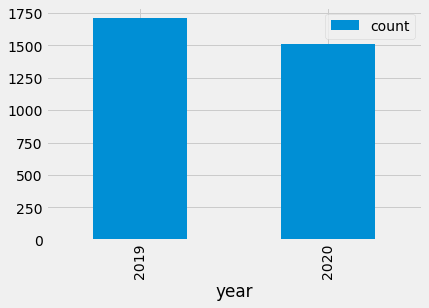

In [44]:
zb_tweet_freq_year.plot('year', 'count', kind='bar')

In [24]:
zb_tweet_freq_month = zb_tweets.groupby(['year','month']).count().reset_index()[['month','id_str']]
zb_tweet_freq_month

,month,id_str
0,4,103
1,5,281
2,6,211
3,7,106
4,8,230
5,9,160
6,10,246
7,11,207
8,12,171
9,1,143


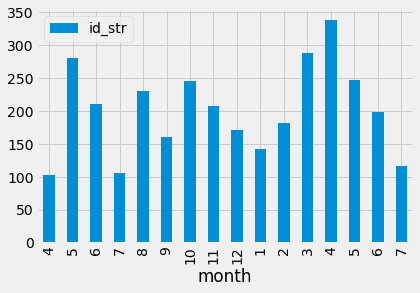

In [45]:
zb_tweet_freq_month.plot('month', 'id_str', kind='bar')

In [39]:
zb_tweet_freq_day = zb_tweets.groupby(['year','day']).count().reset_index()[['day','id_str']]
zb_tweet_freq_day.rename(columns={"id_str": "count"}, inplace=True)
zb_tweet_freq_day

zb_tweet_freq_day_mean = zb_tweet_freq_day.groupby('day').mean().reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     31 non-null     int64  
 1   count   31 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 624.0 bytes


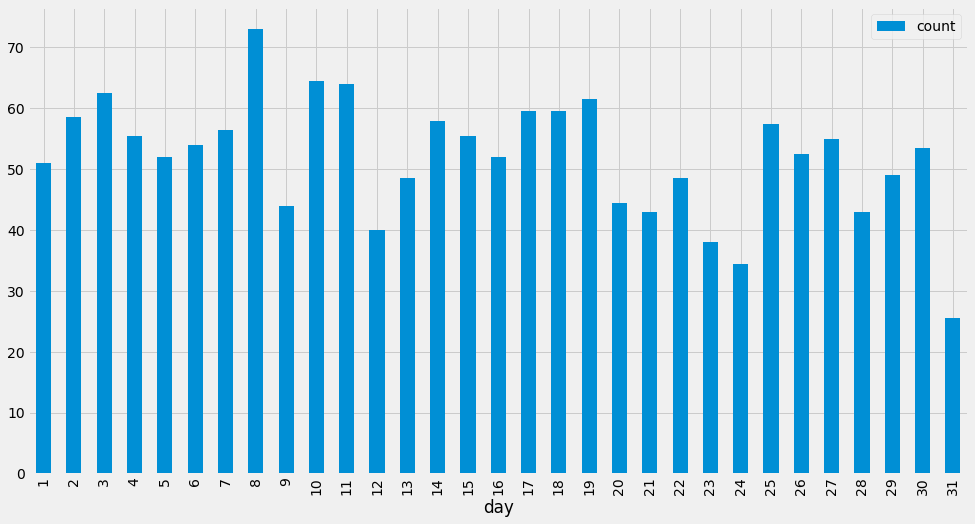

In [55]:
zb_tweet_freq_day_mean.plot('day', 'count', kind='bar', figsize=(15,8))

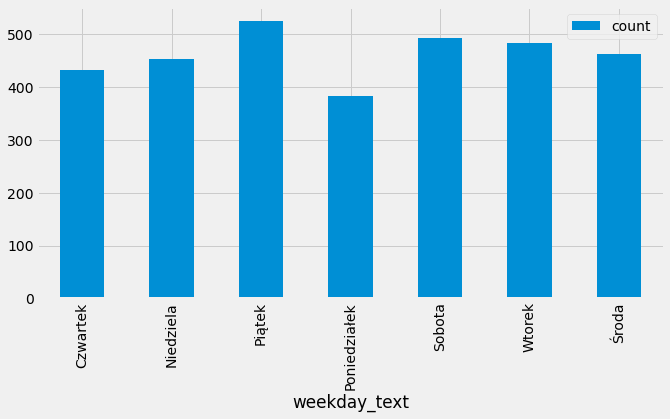

In [67]:
zb_tweet_freq_dayofweek = zb_tweets.groupby('weekday_text').count().reset_index()[['weekday_text','id_str']]
zb_tweet_freq_dayofweek.rename(columns={"id_str": "count"}, inplace=True)
zb_tweet_freq_dayofweek

zb_tweet_freq_dayofweek.plot('weekday_text', 'count', kind='bar', figsize=(10,5))

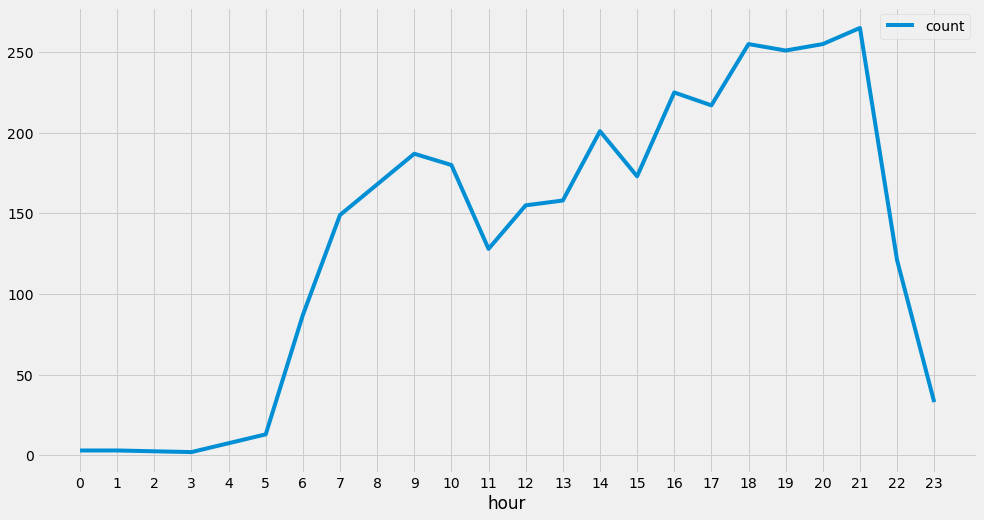

In [86]:
zb_tweet_freq_hour = zb_tweets.groupby('hour').count().reset_index()[['hour','id_str']]
zb_tweet_freq_hour.rename(columns={"id_str": "count"}, inplace=True)
zb_tweet_freq_hour

zb_tweet_freq_hour.plot('hour', 'count', kind='line', figsize=(15,8), xticks=np.arange(0, 24, 1))